# Setting up our Notebook

In [51]:
# Importing things we will need

from datetime import date

# Basic Mathematical/Data tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import textract as txtrct

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

import collections
import re

# sci-kit learn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, confusion_matrix, auc

# Textual month, day and year
today = date.today()

# Versions
print("Today's Date:", today.strftime("%B %d, %Y"))
print('NLTK Version:', nltk.__version__)

Today's Date: May 31, 2022
NLTK Version: 3.7


# Importing our File/s

In [2]:
# Opening our file

# Note: We can open it with read(), readline(), or readline()
# See: https://www.pythontutorial.net/python-basics/python-read-text-file/

with open("Data/Orbit.txt", "r", encoding="unicode_escape") as file:
    text = file.read()

In [3]:
print(text[0:100])

Christopher Clark
565 Cleve Cole Rd.
(972) 854-9024
Christopher.w.clark89@gmail.com



13,900 words



# Pre-processing

## Tokenizing

In [4]:
# Simpler text to print in it's entirety

text="Well, hello, there! My name is Chris and I am learning a bit about how to do some Natural Language Processing through interactive projects! I hope to learn so much for my projects."

In [5]:
# Separating the text into words
word_tokens=nltk.word_tokenize(text)

In [6]:
print('There are', len(word_tokens), 'word tokens in this document.')
print('They are:', '\n', word_tokens)

There are 38 word tokens in this document.
They are: 
 ['Well', ',', 'hello', ',', 'there', '!', 'My', 'name', 'is', 'Chris', 'and', 'I', 'am', 'learning', 'a', 'bit', 'about', 'how', 'to', 'do', 'some', 'Natural', 'Language', 'Processing', 'through', 'interactive', 'projects', '!', 'I', 'hope', 'to', 'learn', 'so', 'much', 'for', 'my', 'projects', '.']


In [7]:
# Separating the text into sentences
sent_tokens=nltk.sent_tokenize(text)

In [8]:
sent_tokens
print('There are', len(sent_tokens), 'sentences in this document.')
print('They are:', '\n', sent_tokens)

There are 3 sentences in this document.
They are: 
 ['Well, hello, there!', 'My name is Chris and I am learning a bit about how to do some Natural Language Processing through interactive projects!', 'I hope to learn so much for my projects.']


## Cleaning up our text

In [9]:
# Stop words
print('Here are some examples of stop words in English:',stopwords.words('english')[0:10])

Here are some examples of stop words in English: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [10]:
# Removing "stop" words

def remove_stop_words(text):
    remove_lower_stop_words=[word for word in text if word.lower() not in stopwords.words('english')]
    upper_stop_words=[word.upper() for word in stopwords.words('english')]
    remove_upper_stop_words=[word for word in remove_lower_stop_words if word.upper() not in upper_stop_words]
    text_minus_stop_words=remove_upper_stop_words
    
    return text_minus_stop_words
    
tokens=remove_stop_words(word_tokens)


In [11]:
print('We have removed the stop words. Here is what the first couple of elements look like:', tokens[0:10])

We have removed the stop words. Here is what the first couple of elements look like: ['Well', ',', 'hello', ',', '!', 'name', 'Chris', 'learning', 'bit', 'Natural']


In [12]:
# Removing punctuation

def remove_punct(text):
    tokenizer = RegexpTokenizer(r'\w+')
    punct_removed = tokenizer.tokenize(str(text))
    
    return punct_removed

In [13]:
tokens=remove_punct(tokens)
print('We have removed the punctuation. Here is what the first couple of elements look like:', tokens[0:10])

We have removed the punctuation. Here is what the first couple of elements look like: ['Well', 'hello', 'name', 'Chris', 'learning', 'bit', 'Natural', 'Language', 'Processing', 'interactive']


In [14]:
# Now, let's just make it all lower case
tokens=[word.lower() for word in tokens]
print('We have made everything lower case. Here are the first several elements:', tokens[0:10])

We have made everything lower case. Here are the first several elements: ['well', 'hello', 'name', 'chris', 'learning', 'bit', 'natural', 'language', 'processing', 'interactive']


# Bag of Words (BoW) and Term Frequency Inverse Document Frequency

# Mathematical Definitions

The *Bag of Words* preprocessing/model can be defined simply as a dictionary containing the words in a sentence/document with their counts. Mathematically, this is:

$$BoW_L = \{ 'word':c_{word} \}$$

Certain functions, like *CountVectorizor* is ski-kit learn will instead, with $\texttt{.todense()}$, will instead return a matrix of size $n×m$, where $n$ is the number of sentences or documents and $m$ is the number of unique words (after tokenization).

Instead of a simple count, we can instead use *Term Frequency-Inverse Document Frequency*, which is a combination *Term Frequency* ($TF$) and *Inverse Document Frequency* ($IDF$). 

We define $TF$ as:

$$TF(t,d)=\frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}}$$

We define $IDF$ as:

$$ IDF(t,d,\mathcal{D}) = \log \frac{|\mathcal{D}|}{|\{d \in \mathcal{D}: t\in d|}$$ 

## Preprocessing

We are now playing with our sentences. We can also think of this list as being several texts we want to analyse. 

In [15]:
sent_tokens

['Well, hello, there!',
 'My name is Chris and I am learning a bit about how to do some Natural Language Processing through interactive projects!',
 'I hope to learn so much for my projects.']

In [16]:
def bag_of_words(text):
    bag_of_words = [collections.Counter(re.findall(r'\w+',word)) for word in text]
    text_bow = sum(bag_of_words, collections.Counter())
    
    return text_bow
    

In [17]:
print('Here is a our simple BoW model:','\n',bag_of_words(tokens), '\n', 'It has', len(bag_of_words(tokens)), 'words.')

Here is a our simple BoW model: 
 Counter({'projects': 2, 'well': 1, 'hello': 1, 'name': 1, 'chris': 1, 'learning': 1, 'bit': 1, 'natural': 1, 'language': 1, 'processing': 1, 'interactive': 1, 'hope': 1, 'learn': 1, 'much': 1}) 
 It has 14 words.


In [18]:
def bow_sklearn(text=sent_tokens):
    c = CountVectorizer(stop_words='english', token_pattern=r'\w+')
    # In our CountVectorizer, we need stop words and punctuation
    converted_data = c.fit_transform(text).todense()
    print('Data shape:',converted_data.shape)
    return converted_data, c.get_feature_names_out()

bow_data, feature_names = bow_sklearn()
print('Here is our sci-kit learn BoW model:')
print('Matrix:','\n',bow_data)
print('There are', len(feature_names), 'features and they are:', '\n',feature_names)

Data shape: (3, 11)
Here is our sci-kit learn BoW model:
Matrix: 
 [[0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 1 1 1 1]
 [0 0 0 1 0 0 1 0 0 0 1]]
There are 11 features and they are: 
 ['bit' 'chris' 'hello' 'hope' 'interactive' 'language' 'learn' 'learning'
 'natural' 'processing' 'projects']


It seems as if we have a difference of words. Let's compare the stop words from nltk and sci-kit learn.

In [19]:
# Comparing the set of stop words

from sklearn.feature_extraction import _stop_words

sklearn_stop_words = _stop_words.ENGLISH_STOP_WORDS
print('The NLTK package has', len(stopwords.words('english')), 'words.')
print('The sci-kit learn package has', len(sklearn_stop_words), 'words.')

The NLTK package has 179 words.
The sci-kit learn package has 318 words.


So, yes, sci-kit learn simple has a larger corpus of stop words.

## Example: Spam Detection

### Preprocessing our Spam Dataset

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
emails=pd.read_csv('Data/Email Collection.csv', delimiter=',', header=None)
emails = emails.astype(object).replace(np.nan, 'None')
# Note, to get this to work, I had to remove the first line where it had the column names

emails

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,Go until jurong point,crazy.. Available only in bugis n great world...,None,None,None,None,None,None,None,None,None,None,None,None
1,0,Ok lar... Joking wif u oni...,None,None,None,None,None,None,None,None,None,None,None,None,None
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,None,None,None,None,None,None,None,None,None,None,None,None,None
3,0,U dun say so early hor... U c already then say...,None,None,None,None,None,None,None,None,None,None,None,None,None
4,0,Nah I dont think he goes to usf,he lives around here though,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,call 087187272008 NOW1 Only 10p per minute. B...,None,None,None,None,None,None,None,None,None,None,None,None
5570,0,Will b going to esplanade fr home,None,None,None,None,None,None,None,None,None,None,None,None,None
5571,0,Pity,was in mood for that. So...any other suggest...,None,None,None,None,None,None,None,None,None,None,None,None
5572,0,The guy did some bitching but I acted like id ...,None,None,None,None,None,None,None,None,None,None,None,None,None


We see that sometimes, there's things in the second text column. Let's combine them into just the first text column.

In [22]:
for i in range(len(emails)):
    if emails[2][i] != 'None':
        emails[1][i] = str(emails[1][i])+str(emails[2][i])

C:\Users\chris\AppData\Local\Temp\ipykernel_15876\3202753951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails[1][i] = str(emails[1][i])+str(emails[2][i])


In [23]:
# Getting only what we want from the emails and making a new dataframe
emails_df=pd.DataFrame(np.array([list(emails[0]), list(emails[1])]).T, columns=['Label', 'Text'])

In [24]:
emails_df

,Label,Text
0,0,Go until jurong point crazy.. Available only i...
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,Nah I dont think he goes to usf he lives aroun...
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will b going to esplanade fr home
5571,0,Pity was in mood for that. So...any other sug...
5572,0,The guy did some bitching but I acted like id ...


In [25]:
def explore_data(data_frame):
    data = data_frame

    plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
    tokenizer = RegexpTokenizer(r'\w+')
    length_count = [len(tokenizer.tokenize(data['Text'][i])) for i in range(0, len(data))]
    plt.hist(length_count)
    plt.title('Histogram of SMS Message Length')
    plt.xlabel('Message Length in Words')
    plt.ylabel('Relative Frequency')
    plt.show()
    
    
    labels = data['Label']
    plt.hist(labels)
    plt.title('Histogram of Class Labels')
    plt.xlabel('Label')
    plt.ylabel('Relative Frequency')
    plt.show()
    
    print('The percentage of spam in this email set is', 100*round(list(data['Label']).count('1')/len(data),4),'%')
        
    return None

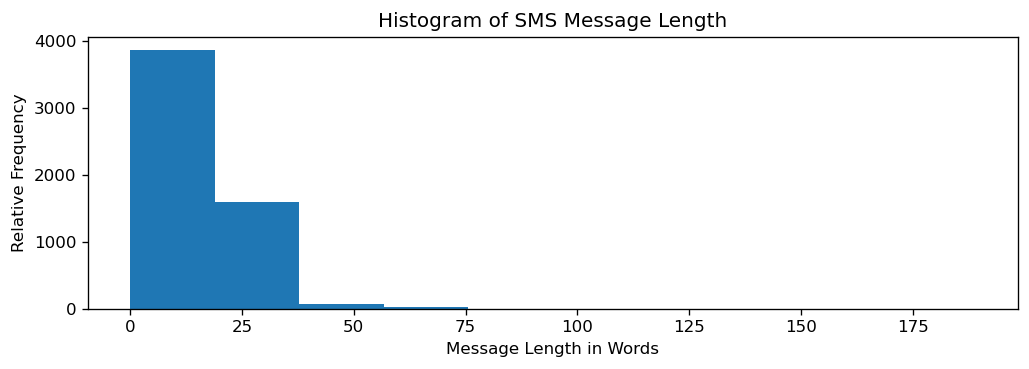

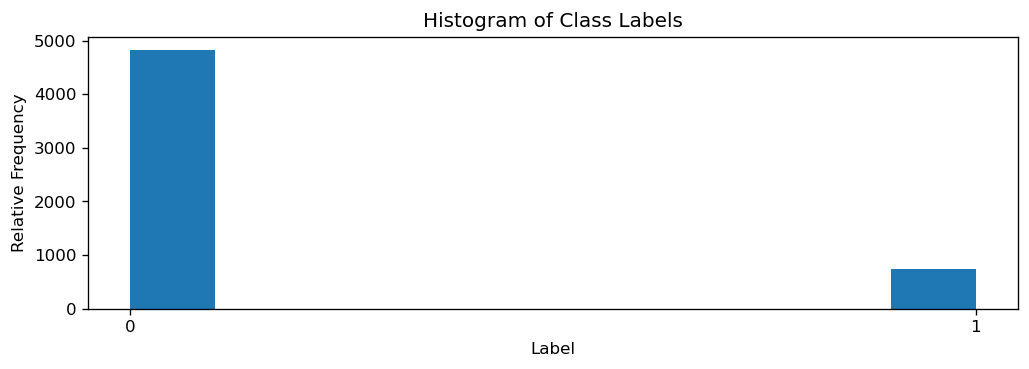

The percentage of spam in this email set is 13.4 %


In [26]:
explore_data(emails_df)

In [89]:
# BoW Preparation

def BoW_prep(data, feature_extractor):
    
    if feature_extractor == 'bow':
        c = CountVectorizer(stop_words='english', token_pattern=r'\w+')
    elif feature_extractor == 'tfidf':
        c = TfidfVectorizer(stop_words='english', token_pattern=r'\w+')
    else:
        print('You much choose tf or tfidf as the feature extractor.')
    l = LabelEncoder()
    
    x = c.fit_transform(data['Text']).todense()
    print('X matrix:',x)
    y = l.fit_transform(data['Label'])
    print('y matrix:', y)
    print('Vocabulary Size: ' + str(len(c.vocabulary_)))
    return x, y 

In [90]:
X_bow, y = BoW_prep(emails_df, 'bow')

X matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y matrix: [0 0 1 ... 0 0 0]
Vocabulary Size: 8588


In [91]:
X_tfidf, y = BoW_prep(emails_df, 'tfidf')

X matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y matrix: [0 0 1 ... 0 0 0]
Vocabulary Size: 8588


### Running our Models with BoW and TFIDF

In [92]:
# Train and test splitting

def train_test_splitting(X, y, test_size, shuffle):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_test=np.array(X_test)
    y_test=np.array(y_test)
    
    return X_train, y_train, X_test, y_test

#### Logistic Regression

In [93]:
def Logistic_Regression_Model(X_train, y_train, X_test, y_test, solver, penalty, verbose, max_iter):
    model = LogisticRegression(solver=solver, penalty=penalty, verbose=verbose, max_iter=max_iter)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # TPR defines how many correct positive results occur among all positive samples during the test. 
    # FPR, defines how many incorrect positive results occur among all negative samples during the test.
    
    fpr, tpr = roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1]
    
    # AUC is a summary of how well it is classifing
    auc_score = auc(fpr, tpr)
    
    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, 
    # ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);
    
    print('The AUC score is:', round(auc_score,4))
    
    

The AUC score is: 0.9188


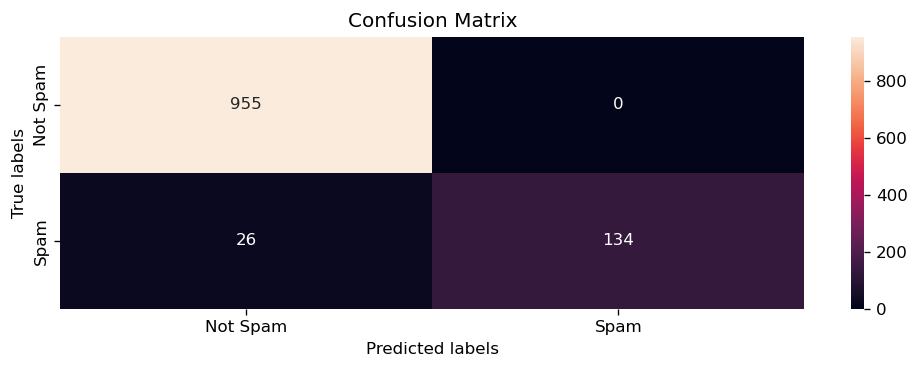

In [94]:
# BoW version

X_train, y_train, X_test, y_test = train_test_splitting(X_bow, y, 0.2, True)
Logistic_Regression_Model(X_train, y_train, X_test, y_test, 'lbfgs', 'l2', 0, 100)

The AUC score is: 0.8253


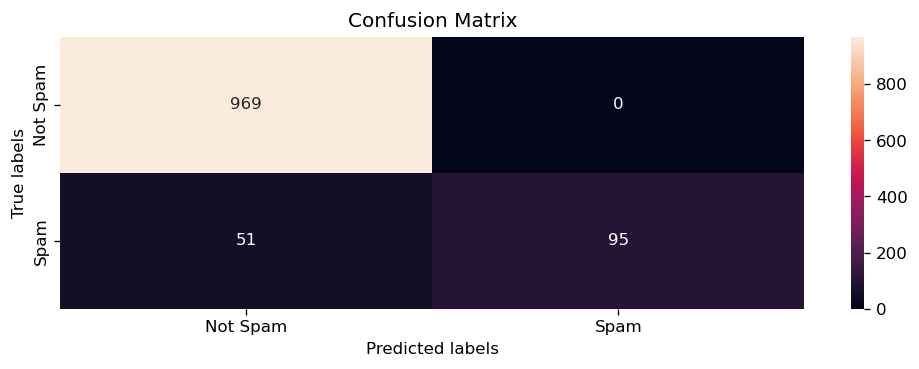

In [61]:
X_train, y_train, X_test, y_test = train_test_splitting(X_tfidf, y, 0.2, True)
Logistic_Regression_Model(X_train, y_train, X_test, y_test, 'lbfgs', 'l2', 0, 100)

#### Decision Tree Classifier

In [32]:
def Decision_Tree_Classifier(X_train, y_train, X_test, y_test, max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # TPR defines how many correct positive results occur among all positive samples during the test. 
    # FPR, defines how many incorrect positive results occur among all negative samples during the test.
    
    fpr, tpr = roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1]
    
    # AUC is a summary of how well it is classifing
    auc_score = auc(fpr, tpr)
    
    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, 
    # ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
    
    print('The AUC score is:', round(auc_score,4))  

The AUC score is: 0.9104


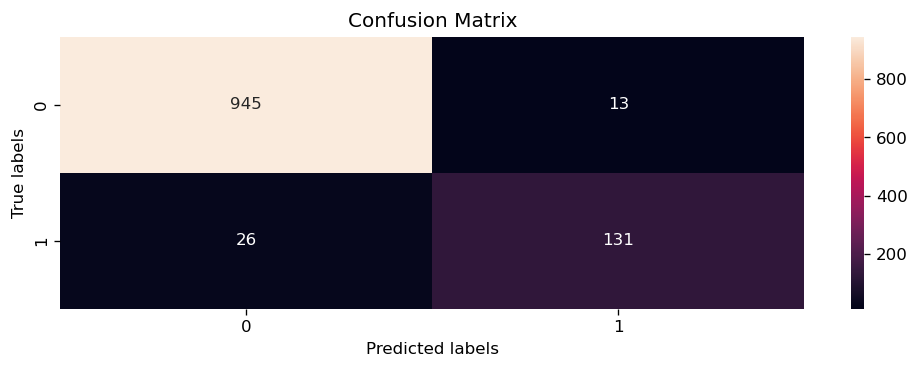

In [81]:
X_train, y_train, X_test, y_test = train_test_splitting(X_bow, y, 0.2, True)
Decision_Tree_Classifier(X_train, y_train, X_test, y_test, 150)

The AUC score is: 0.9185


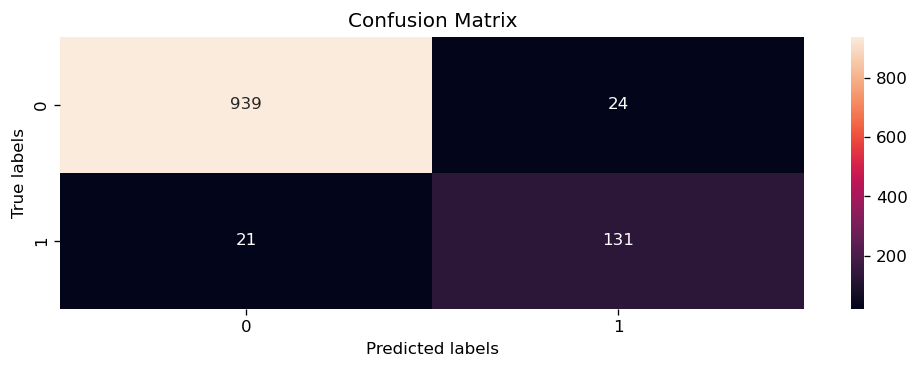

In [63]:
X_train, y_train, X_test, y_test = train_test_splitting(X_tfidf, y, 0.2, True)
Decision_Tree_Classifier(X_train, y_train, X_test, y_test, 150)

## Example: Movie Reviews

### Preparing the Reviews

In [64]:
# Needed to remove characters that will cause unicode errors

def remove_non_ascii(text):
    return ''.join([word for word in text if ord(word) < 128])

In [65]:
def load_data():
    
    # os.listdir() method in python is used to get the 
    # list of all files and directories in the specified directory. 
    
    negative_review_strings = os.listdir('Movie Reviews/review_data/tokens/neg')
    positive_review_strings = os.listdir('Movie Reviews/review_data/tokens/pos')
    negative_reviews, positive_reviews = [], []
    
    for positive_review in positive_review_strings:
        with open('Movie Reviews/review_data/tokens/pos/'+str(positive_review), 'r') as positive_file:
            positive_reviews.append(remove_non_ascii(positive_file.read()))
    # Note, since we have the "open()" as 'r', we need to do file.read() to access it
    
    for negative_review in negative_review_strings:
        with open('Movie Reviews/review_data/tokens/neg/'+str(negative_review), 'r') as negative_file:
            negative_reviews.append(remove_non_ascii(negative_file.read()))
    
    negative_labels, positive_labels = np.repeat(0, len(negative_reviews)), np.repeat(1, len(positive_reviews))
    # This just makes a bunch of 0s and 1s
    
    labels = np.concatenate([negative_labels, positive_labels])
    # Getting our full list of 0s and 1s
    reviews = np.concatenate([negative_reviews, positive_reviews])
    # Gettings all our reviews in order of negative then positive
    
    # From here, we could sample the rows if we wanted, or we could leave it the full dataset
#     rows = np.random.random_integers(0, len(reviews)-1, len(reviews)-1) 
#     data = pd.DataFrame(np.array([labels[rows], reviews[rows]]).T, columns=['Label', 'Text'])

    data = pd.DataFrame(np.array([labels, reviews]).T, columns=['Label', 'Text'])

    return data

In [66]:
movie_data = load_data()

In [67]:
movie_data.head()

,Label,Text
0,0,"tristar / 1 : 30 / 1997 / r ( language , viole..."
1,0,arlington road 1/4 . directed by mark pellingt...
2,0,the brady bunch movie is less a motion picture...
3,0,janeane garofalo in a romantic comedy -- it wa...
4,0,"i'm going to keep this plot summary brief , so..."


### Running our Models

In [82]:
X_bow, y = BoW_prep(movie_data, 'bow')

X matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 2 ... 0 0 0]]
y matrix: [0 0 0 ... 1 1 1]
Vocabulary Size: 35300


In [69]:
X_tfidf, y = BoW_prep(movie_data, 'tfidf')

X matrix: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.0697325 ]
 [0.         0.         0.04529981 ... 0.         0.         0.        ]]
y matrix: [0 0 0 ... 1 1 1]
Vocabulary Size: 35300


#### Logistic Regression

The AUC score is: 0.7922


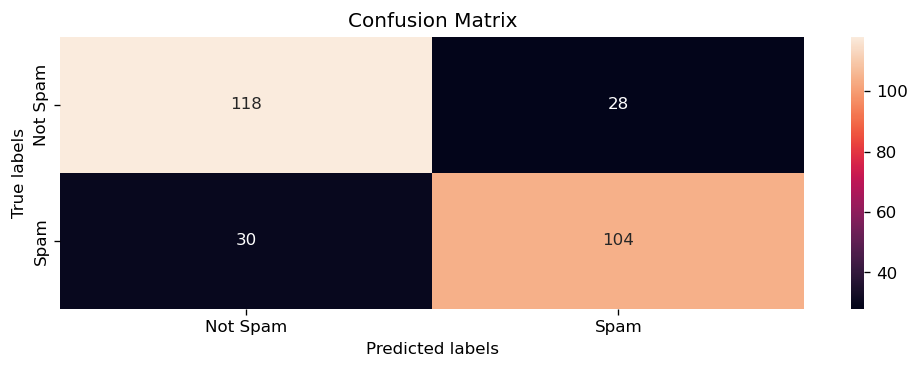

In [83]:
X_train, y_train, X_test, y_test = train_test_splitting(X_bow, y, 0.2, True)
Logistic_Regression_Model(X_train, y_train, X_test, y_test, 'lbfgs', 'l2', 0, 150)

The AUC score is: 0.8048


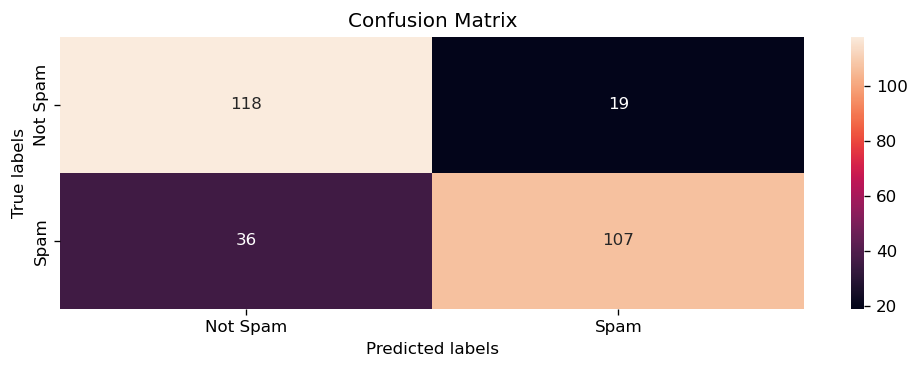

In [77]:
X_train, y_train, X_test, y_test = train_test_splitting(X_tfidf, y, 0.2, True)
Logistic_Regression_Model(X_train, y_train, X_test, y_test, 'lbfgs', 'l2', 0, 150)

#### Decision Tree Classifier

The AUC score is: 0.6609


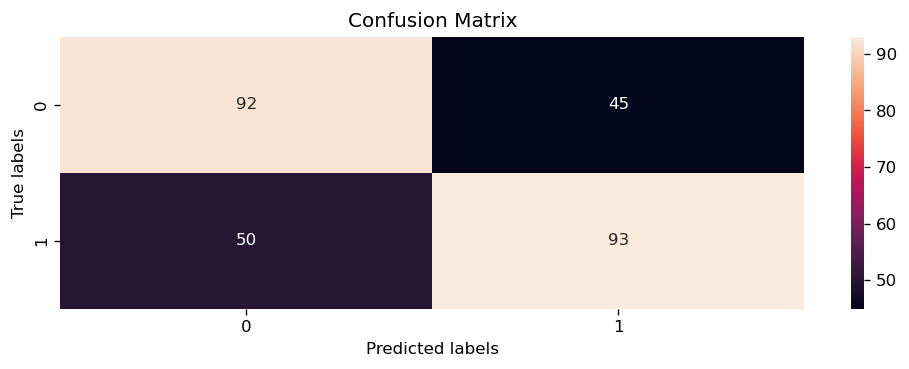

In [84]:
X_train, y_train, X_test, y_test = train_test_splitting(X_bow, y, 0.2, True)
Decision_Tree_Classifier(X_train, y_train, X_test, y_test, 150)

The AUC score is: 0.6275


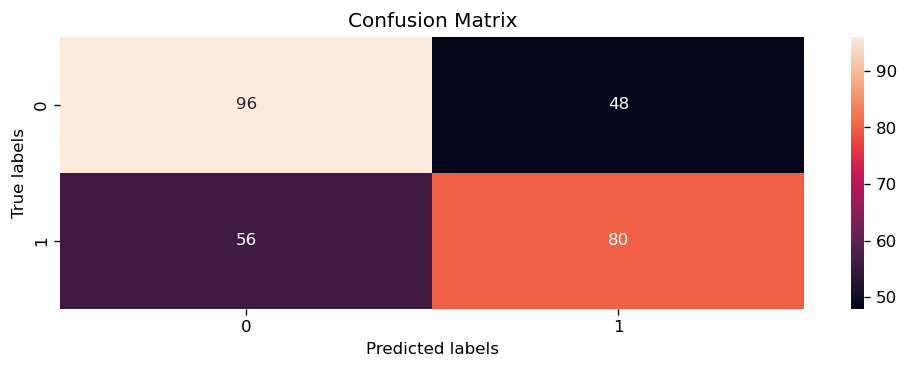

In [73]:
X_train, y_train, X_test, y_test = train_test_splitting(X_tfidf, y, 0.2, True)
Decision_Tree_Classifier(X_train, y_train, X_test, y_test, 150)